In [2]:
import numpy as  np
import matplotlib.pyplot as plt

In [91]:
n_train = 10
n_test = 100
p_range = np.arange(1,10)

# find coefficients for parabola

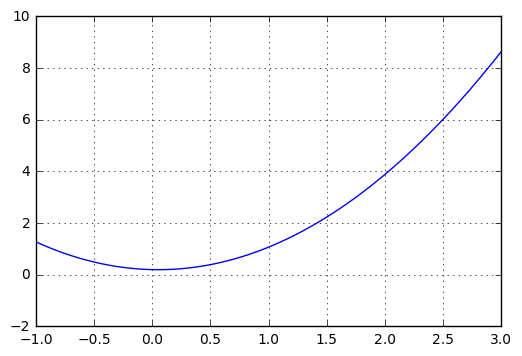

In [24]:
a = 0.97
b = -0.1
c = 0.2
x = np.linspace(-1,3,num=100)
y = a*x*x + b*x + c
plt.plot(x, y)
plt.axis([-1,3,-2,10])
plt.grid(True)
plt.show()

# plot training data and true parabola

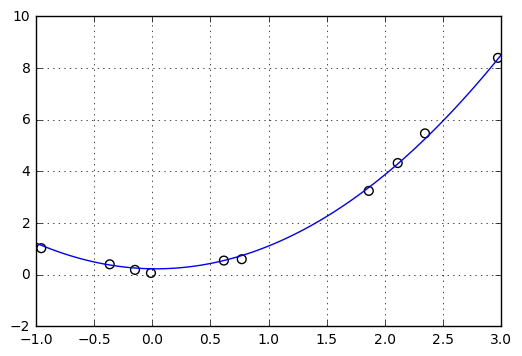

In [142]:
x_train = np.random.uniform(-1.0, 3.0, [10])
y_train_noise = np.random.uniform(-0.2, 0.2, [10])
y_train = a*pow(x_train,2)+ b*x_train + c + y_train_noise
plt.scatter(x_train, y_train, s=40, facecolors='none')
plt.plot(x, y)
plt.axis([-1,3,-2,10])
plt.grid(True)
plt.show()

# Find weights theta for n=1, n=2, n=9 to make figure on page 12

In [167]:
# linear regression for polinomial n = 2
y_train1 = np.expand_dims(y_train,1)
X = np.stack([np.ones(n_train), x_train, np.power(x_train, 2)], axis=1)
# closed up solution from slide # 11
# theta = (X^t X)^(-1)X^t y
theta2 = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(X),X)),np.matrix.transpose(X)),y_train1)

In [80]:
x_test = np.random.uniform(-1.0, 3.0, [100])

In [144]:
X = np.stack([np.ones(n_test), x_test, np.square(x_test)], axis=1)
y_pred2 = np.matmul(X, theta2)

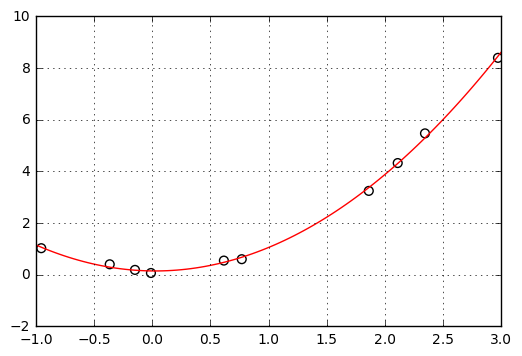

In [145]:
# show train data and a curve with n = 2 
#plt.scatter(x_test, y_pred2, s=5, facecolors='none', edgecolors='g')
plt.scatter(x_train, y_train, s=40, facecolors='none', edgecolors='k')
x = np.linspace(-1,3,num=100)
X = np.stack([np.ones(n_test), x, np.square(x)], axis=1)
y = np.matmul(X, theta2)
plt.plot(x, y, 'r-')
plt.axis([-1,3,-2,10])
plt.axis([-1,3,-2,10])
plt.grid(True)
plt.show()

In [146]:
# linear regression for polinomial n = 9
y_train1 = np.expand_dims(y_train,1)
ars = [ np.power(x_train, i) for i in range(1,10)]
X = np.stack([np.ones(n_train)] + ars, axis=1)
theta9 = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(X),X)),np.matrix.transpose(X)),y_train1)

In [151]:
# linear regression for polinomial n = 1
y_train1 = np.expand_dims(y_train,1)
ars = [ np.power(x_train, i) for i in range(1,2)]
X = np.stack([np.ones(n_train)] + ars, axis=1)
theta1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(X),X)),np.matrix.transpose(X)),y_train1)

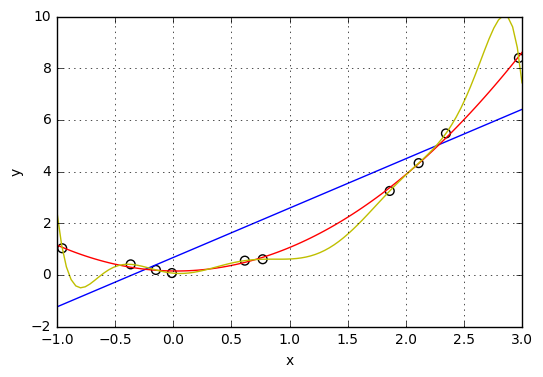

In [214]:
# make a figure as in page 12
x = np.linspace(-1,3,num=100)
# n = 1
X = np.stack([np.ones(n_test), x], axis=1)
y_pred1 = np.matmul(X, theta1)
plt.plot(x, y_pred1, 'b-')
# n = 2
X = np.stack([np.ones(n_test), x, np.square(x)], axis=1)
y_pred2 = np.matmul(X, theta2)
plt.plot(x, y_pred2, 'r-')
# n = 9
ars = [ np.power(x, i) for i in range(1,10)]
X = np.stack([np.ones(n_test)] + ars, axis=1)
y_pred9 = np.matmul(X, theta9)
plt.plot(x, y_pred9, 'y-')
# train data
plt.scatter(x_train, y_train, s=40, facecolors='none', edgecolors='k')

plt.axis([-1,3,-2,10])
plt.axis([-1,3,-2,10])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Find optimal capacity for a model among n = 1, 2, ..., 9

In [197]:
# linear regression for polinomial n = 1, 2, ..., 9
y_train = a*pow(x_train,2)+ b*x_train + c + y_train_noise
y_train1 = np.expand_dims(y_train,1)
thetas = [[] for _ in range(len(p_range))]
for p in p_range:
    ars = [ np.power(x_train, i) for i in range(1,p+1)]
    X = np.stack([np.ones(n_train)] + ars, axis=1)
    thetas[p-1] = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(X),X)),np.matrix.transpose(X)),y_train1)

In [206]:
#find root MSE for test and training data for models of all capacities
mse_train = np.zeros(len(p_range))
mse_test = np.zeros(len(p_range))

y_test = a*pow(x_test,2)+ b*x_test + c 
y_test1 = np.expand_dims(y_test,1)

for p in p_range:
    # test root MSE
    ars = [ np.power(x_test, i) for i in range(1,p+1)]
    X = np.stack([np.ones(n_test)] + ars, axis=1)
    y_pred_pe = np.matmul(X, thetas[p-1])    
    mse_test[p-1] = np.sqrt(np.mean(np.power(y_test1 - y_pred_pe, 2)))
    
    # train root MSE
    ars = [ np.power(x_train, i) for i in range(1,p+1)]
    X = np.stack([np.ones(n_train)] + ars, axis=1)
    y_pred_pr = np.matmul(X, thetas[p-1])    
    mse_train[p-1] = np.sqrt(np.mean(np.power(y_train1 - y_pred_pr, 2)))

# Optimal capacity is for n = 2, where there is good generalization (low test MSE) and no underfitting or overfitting (low train MSE) 

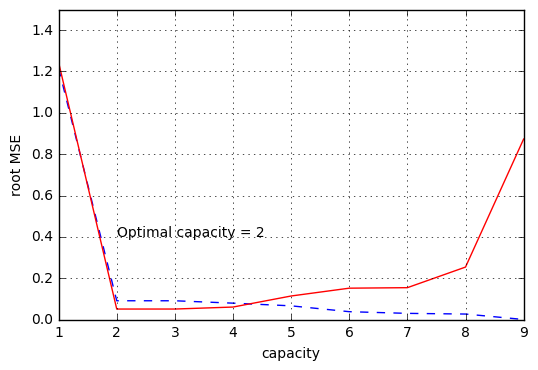

In [213]:
# plot MSE for models with different capacity
# x axis - capacity
# y axis - root MSE

x = np.linspace(1,9,num=9)
# train root MSE - blue dotten line
plt.plot(x, mse_train, 'b--')
# test root MSE - red line
plt.plot(x, mse_test, 'r-')

plt.axis([1,9,0,1.5])
plt.ylabel('root MSE')
plt.xlabel('capacity')
plt.text(2,0.4,'Optimal capacity = 2')
plt.grid(True)
plt.show()